In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 186.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 163.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 202.3 kB/s eta 0:00:00
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 3.2 MB/s eta 0:00:03
   ---------------------------------------- 0.1/8.7 MB 975.2 kB/s eta 0:00:09
   ---------------------------------------- 0.1/8.7 MB 744.7 kB/s eta 0:00:12
   ---------------------------------------- 0.1/8.7 MB 451.8 kB/s eta 0:00:20
    ---------------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
dataset.drop(columns=['society','balcony','area_type'] , inplace=True)

In [7]:
dataset['location'] = dataset['location'].fillna('Whitefield')

In [8]:
dataset['size'] = dataset['size'].fillna('2 BHK')

In [9]:
dataset['bath'] = dataset['bath'].fillna(dataset['bath'].median())

In [10]:
dataset['availability']=dataset['availability'].fillna('Ready To Move')

In [11]:
dataset['BHK'] = dataset['size'].str.split().str.get(0).astype(int)

In [12]:
dataset.head()

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
dataset['total_sqft']


0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [14]:
def range_converer(x):
    N = x.split('-')
    if len(N) == 2:
        return (float(x[0])+float(x[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
dataset['total_sqft'] = dataset['total_sqft'].apply(range_converer)

In [16]:
dataset.head()

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [17]:
dataset['price_per_sqft'] = (dataset['price']*100000)/dataset['total_sqft']

In [18]:
dataset.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1305,), dtype=object)

In [20]:
dataset['location'] = dataset['location'].apply(lambda x:x.strip())

In [21]:
location_count = dataset['location'].value_counts()

In [22]:
location_count

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [23]:
location_count_less = location_count[location_count <=15]
location_count_less

location
Benson Town                       15
Nagavarapalya                     15
Kodihalli                         15
Varthur Road                      15
Chamrajpet                        15
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1113, dtype: int64

In [24]:
dataset['location'] = dataset['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [25]:
dataset['location'].value_counts()

location
other                    3646
Whitefield                542
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
                         ... 
Kereguddadahalli           16
Banashankari Stage VI      16
Cooke Town                 16
Kasturi Nagar              16
Parappana Agrahara         16
Name: count, Length: 182, dtype: int64

In [26]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1531.448708,2.688814,112.565627,2.802778,7.629203e+04
std,1243.564986,1.338754,148.971674,1.294496,8.111395e+05
min,0.500000,1.000000,8.000000,1.000000,2.678298e+02
25%,1096.000000,2.000000,50.000000,2.000000,4.284323e+03
50%,1265.000000,2.000000,72.000000,3.000000,5.497606e+03
75%,1660.000000,3.000000,120.000000,3.000000,7.486711e+03
max,52272.000000,40.000000,3600.000000,43.000000,3.180000e+07


In [27]:
dataset = dataset[(dataset['total_sqft']/dataset['BHK'])>=300]
dataset = dataset[dataset['BHK'] <= 5]
dataset = dataset[dataset['bath'] <= 5]

In [28]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,1532.869485,2.464600,104.405309,2.569553,6227.897981
std,1110.464023,0.851249,128.601046,0.783795,4010.477759
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1111.000000,2.000000,48.950000,2.000000,4200.279518
50%,1290.000000,2.000000,69.000000,2.000000,5284.861974
75%,1658.250000,3.000000,110.000000,3.000000,6857.142857
max,52272.000000,5.000000,2912.000000,5.000000,176470.588235


In [29]:
dataset.shape

(12034, 8)

In [30]:
dataset.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
dataset = dataset[['location', 'total_sqft' , 'BHK' , 'bath' , 'price','availability']]

In [32]:
lower_limit=dataset['price'].mean()-dataset['price'].std()*3
upper_limit=dataset['price'].mean()+dataset['price'].std()*3
dataset['price']=np.where(dataset['price']>upper_limit,
                     upper_limit,
                     np.where(dataset['price']<lower_limit,lower_limit,dataset['price']))

In [33]:
dataset.head()

,location,total_sqft,BHK,bath,price,availability
0,Electronic City Phase II,1056.0,2,2.0,39.07,19-Dec
1,Chikka Tirupathi,2600.0,4,5.0,120.00,Ready To Move
2,Uttarahalli,1440.0,3,2.0,62.00,Ready To Move
3,Lingadheeranahalli,1521.0,3,3.0,95.00,Ready To Move
4,Kothanur,1200.0,2,2.0,51.00,Ready To Move


In [34]:
X = dataset[['location', 'total_sqft', 'BHK', 'bath', 'availability']]
y = dataset['price']

In [35]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [36]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [37]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore') , ['location','availability']),
        ('scaler' , StandardScaler() , ['total_sqft' ,'BHK' ,'bath'])
    ],
    remainder='passthrough'
)

In [38]:
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(learning_rate=0.5 , n_estimators=80)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300,max_depth=10)

In [39]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct , model)

In [40]:
pipe

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
pipe.fit(X_train , y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
r2=r2_score(y_test,y_pred)
print("R2 Score:" , r2)

R2 Score: 0.7216556848832598


In [44]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     --------- --------------------------- 30.7/114.6 kB 660.6 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/114.6 kB 393.8 kB/s eta 0:00:01
     ------------------- ----------------- 61.4/114.6 kB 363.1 kB/s eta 0:00:01
     ------------------- ----------------- 61.4/114.6 kB 363.1 kB/s eta 0:00:01
     ----------------------- ------------- 71.7/114.6 kB 302.7 kB/s eta 0:00:01
     ----------------------------- ------- 92.2/114.6 kB 327.7 kB/s eta 0:00:01
     -----------------------------------  112.6/114.6 kB 344.8 kB/s eta 0:00:01
     ------------------------------------ 114.6/114.6 kB 303.3 kB/s eta 0:00:00
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 653.6 kB/s eta 0:00:13
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


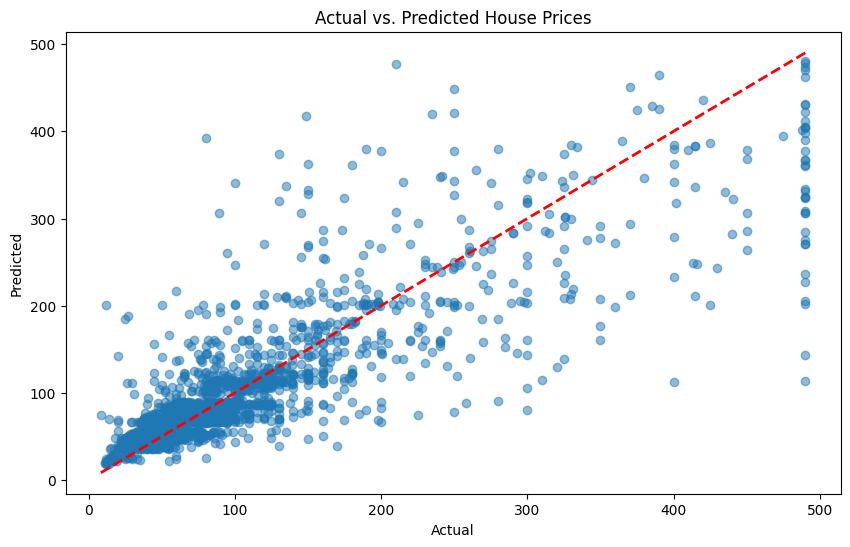

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [46]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pickle
pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
pickle.dump(dataset , open('dataset.pkl','wb'))